In [ ]:
# import system libs
import os
import time
import shutil
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_dir = '/content/drive/MyDrive/image_data_final.csv'
data = pd.read_csv(data_dir)
label_mapping = {
    'akiec': 0,
    'bcc': 1,
    'bkl': 2,
    'df': 3,
    'nv': 4,
    'vasc': 5,
    'mel': 6,
    'nor' : 7
}

# Replace the "Image_Name" values with the mapped values
data['class'] = data['class'].map(label_mapping)
data.head()

In [ ]:
Label = data["class"]
Data = data.drop(['class','Image_Name'], axis=1)

In [ ]:
data["class"].value_counts()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
Data, Label  = oversample.fit_resample(Data, Label)
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

In [ ]:
Data

In [ ]:
Label = np.array(Label)
Label

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma'),
           7: ('nor', 'Normal')}

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [ ]:
X_train

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgen = ImageDataGenerator(rescale=(1./255))

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [ ]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=8, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()



In [ ]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=15 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/15
315/315 [==============================] - 322s 1s/step - loss: 1.4564 - accuracy: 0.4551 - val_loss: 1.0878 - val_accuracy: 0.5739 - lr: 0.0010
Epoch 2/15
315/315 [==============================] - 334s 1s/step - loss: 0.8643 - accuracy: 0.6604 - val_loss: 0.7369 - val_accuracy: 0.7085 - lr: 0.0010
Epoch 3/15
315/315 [==============================] - 346s 1s/step - loss: 0.6236 - accuracy: 0.7502 - val_loss: 0.6034 - val_accuracy: 0.7496 - lr: 0.0010
Epoch 4/15
315/315 [==============================] - 335s 1s/step - loss: 0.4516 - accuracy: 0.8146 - val_loss: 0.4594 - val_accuracy: 0.8063 - lr: 0.0010
Epoch 5/15
315/315 [==============================] - 314s 999ms/step - loss: 0.3370 - accuracy: 0.8542 - val_loss: 0.4162 - val_accuracy: 0.8301 - lr: 0.0010
Epoch 6/15
315/315 [==============================] - 336s 1s/step - loss: 0.2667 - accuracy: 0.8814 - val_loss: 0.3289 - val_accuracy: 0.8626 - lr: 0.0010
Epoch 7/15
315/315 [==============================] - 333s 1s

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


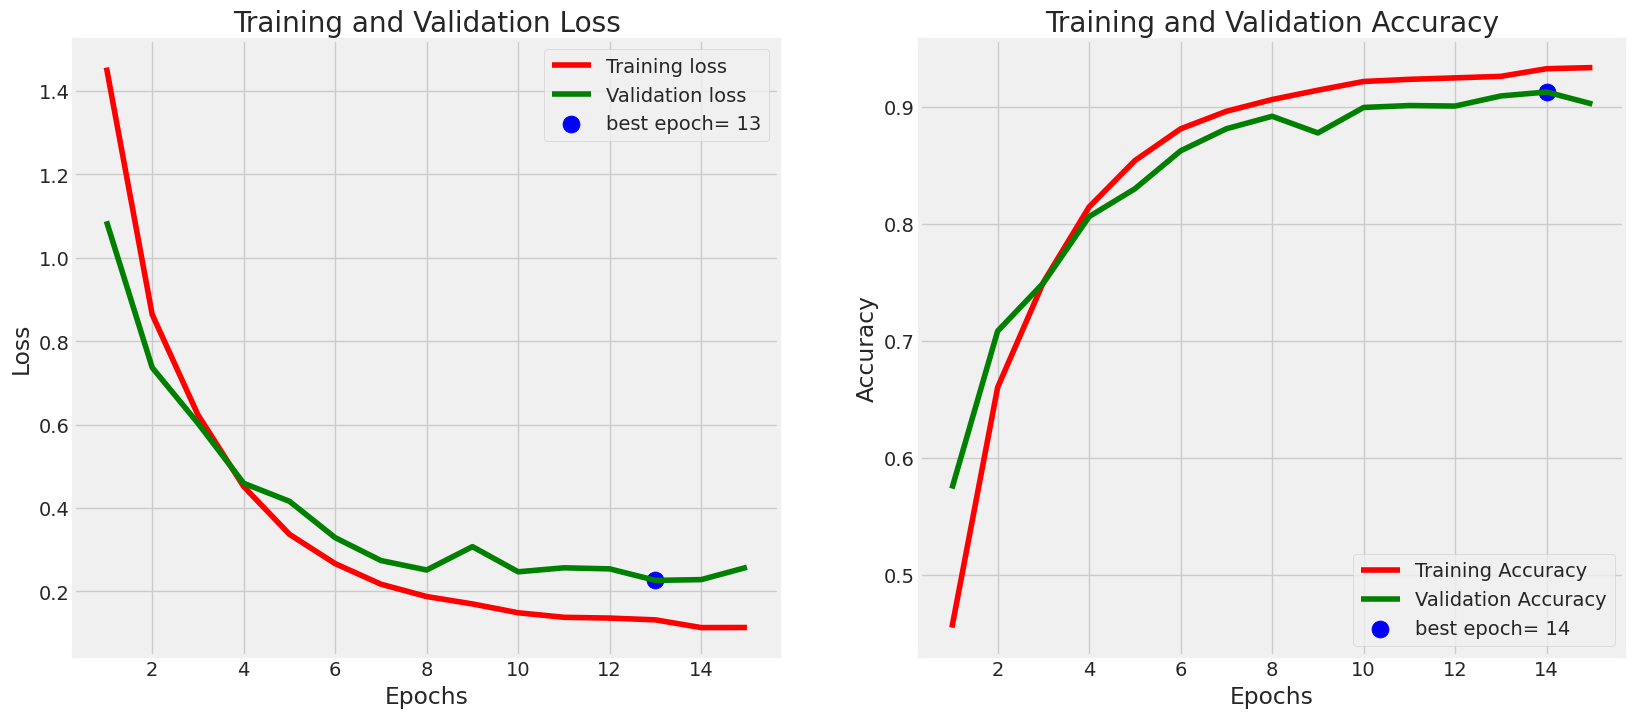

In [ ]:
plot_training(history)

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

420/420 [==============================] - 45s 108ms/step - loss: 0.2580 - accuracy: 0.9025
Train Loss:  0.10938319563865662
Train Accuracy:  0.9359930157661438
--------------------
Test Loss:  0.2580147981643677
Test Accuracy:  0.9025354385375977


In [ ]:
y_true = np.array(y_test)
y_pred = model.predict(X_test)
y_pred

77/77 [==============================] - 5s 70ms/step


array([[4.04789345e-04, 6.04942616e-04, 6.79102668e-05, ...,
        9.97635841e-01, 8.77933708e-05, 3.90298635e-04],
       [7.01816170e-04, 2.18055473e-04, 3.44397326e-04, ...,
        2.19224603e-04, 2.73211888e-04, 9.97393489e-01],
       [2.75301814e-01, 4.57047045e-01, 1.72596686e-02, ...,
        3.14196199e-02, 1.03752315e-01, 1.03287557e-02],
       ...,
       [1.64268247e-03, 9.95703816e-01, 4.69800987e-04, ...,
        2.75626982e-04, 8.49371019e-04, 2.59552326e-04],
       [5.68910618e-04, 4.42733508e-05, 9.90800676e-04, ...,
        4.94351611e-04, 5.93414938e-04, 9.95652795e-01],
       [9.07338166e-04, 2.83375957e-05, 7.66702055e-04, ...,
        1.50669817e-04, 9.96922433e-01, 1.26933941e-04]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred , axis=1)
y_true = np.argmax(y_true , axis=1)
y_pred

array([5, 7, 1, ..., 1, 7, 6])

In [ ]:
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

[4, 6, 2, 1, 5, 0, 3, 7]


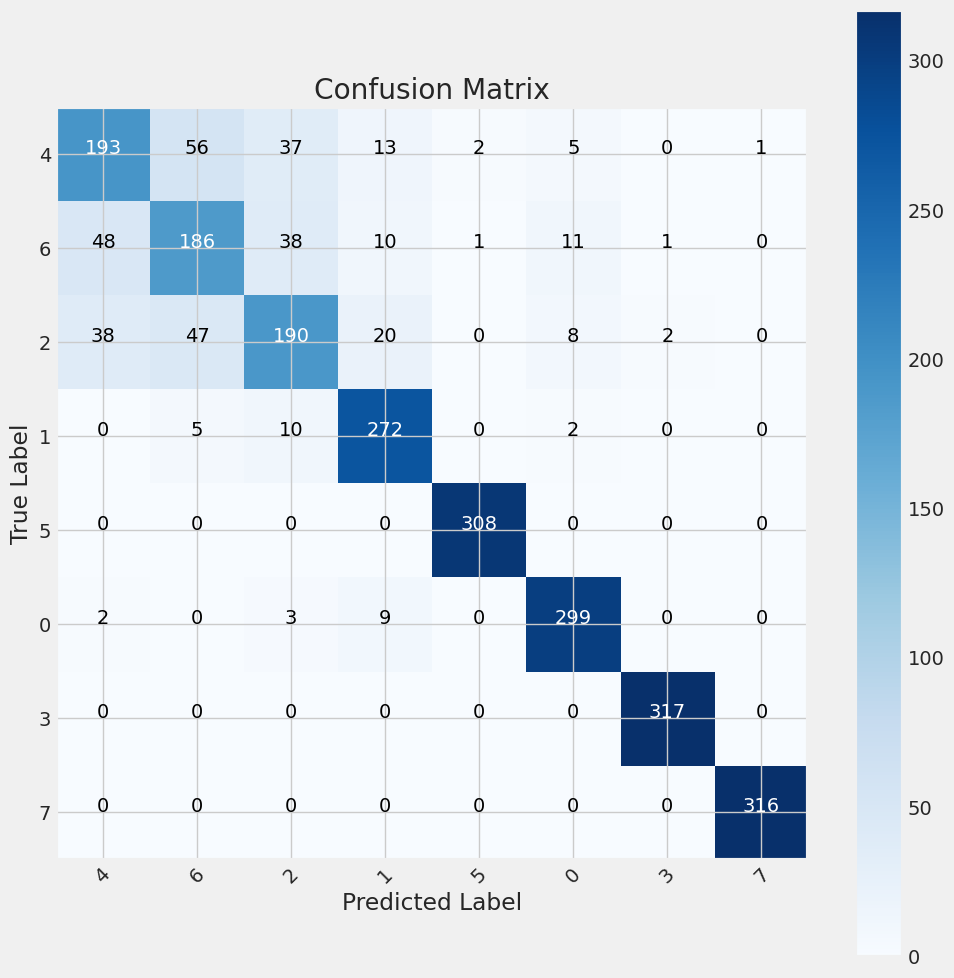

In [ ]:
# Confusion matrix
cm = cm = confusion_matrix(y_true, y_pred, labels=classes_labels)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
#Save the model
import pickle
pickle.dump(model, open("/content/drive/MyDrive/cnn.pkl", 'wb'))

In [ ]:
import pickle
model1 = pickle.load(open("/content/drive/MyDrive/cnn.pkl",'rb'))

In [ ]:
model.save('/content/drive/MyDrive/Skin Cancer1.h5')

In [ ]:
import cv2
import numpy as np
# Function to resize and extract pixel values for a single image
def process_single_image(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (28, 28))
    # Extract R, G, B channels
    b, g, r = cv2.split(resized_image)
    # Flatten pixel values and concatenate channels
    pixel_values = list(r.flatten()) + list(g.flatten()) + list(b.flatten())
    return pixel_values

# Path to a single image
image_path = '/content/F5rIDV4aoAArilb.jpeg'

# Process the single image and get pixel values
pixel_values = process_single_image(image_path)

# Now, pixel_values contains the pixel values of the single image
a = np.array(pixel_values).reshape(-1, 28, 28, 3)
b = model1.predict(a)
c = np.argmax(b , axis=1)
print(c)


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma'),
           7: ('nor', 'Normal')}